In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hdbscan

In [2]:
os.getcwd()

'C:\\Users\\HP'

In [3]:
train=pd.read_csv("train_cab.csv")

In [4]:
test=pd.read_csv("test.csv")

In [5]:
print(train.shape)
print(test.shape)

(16067, 7)
(9914, 6)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [8]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [9]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [11]:
train['fare_amount']=pd.to_numeric(train['fare_amount'],errors='coercion')
print(f"There are {len(train[train['fare_amount'] < 2.5])} fares less than Base fare.")
print(f"There are {len(train[train['fare_amount'] > 100])} fares more than 100.")

There are 6 fares less than Base fare.
There are 9 fares more than 100.


In [12]:
train=train[(train['fare_amount'] >= 2.5)] 
train=train[train['fare_amount']<100]

In [13]:
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'], errors='coerce')
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16027 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16027 non-null float64
pickup_datetime      16026 non-null datetime64[ns, UTC]
pickup_longitude     16027 non-null float64
pickup_latitude      16027 non-null float64
dropoff_longitude    16027 non-null float64
dropoff_latitude     16027 non-null float64
passenger_count      15972 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 1001.7 KB


In [15]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [16]:
for train in [test,train]:
    train['year']=train['pickup_datetime'].dt.year
    train['month']=train['pickup_datetime'].dt.month
    train['day']=train['pickup_datetime'].dt.day
    train['dayofweek']=train['pickup_datetime'].dt.dayofweek
    train['hour']=train['pickup_datetime'].dt.hour
    train=train.drop('pickup_datetime',axis=1)

In [17]:
train.head(10)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1.0,2011.0,1.0,6.0,3.0,9.0
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1.0,2012.0,11.0,20.0,1.0,20.0
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1.0,2012.0,1.0,4.0,2.0,17.0
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2.0,2009.0,9.0,2.0,2.0,1.0
10,5.3,-73.996335,40.737142,-73.980721,40.733559,1.0,2012.0,4.0,8.0,6.0,7.0


In [18]:
train.isnull().sum()

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  1
month                 1
day                   1
dayofweek             1
hour                  1
dtype: int64

In [19]:
train=train[np.isnan(train['hour'])==False]

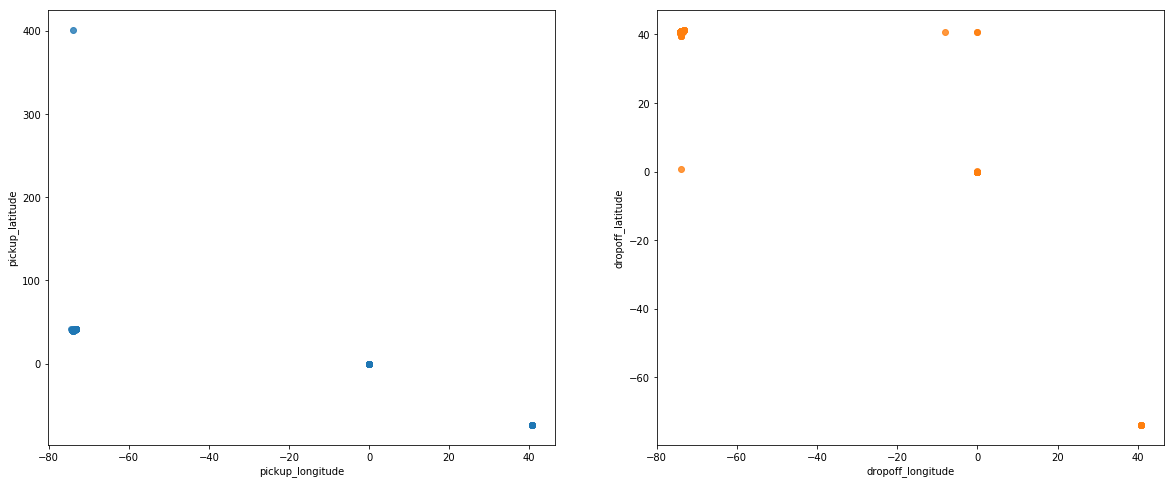

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))
axes = axes.flatten()
sns.regplot('pickup_longitude', 'pickup_latitude',data=train, ax = axes[0],fit_reg = False);
sns.regplot('dropoff_longitude', 'dropoff_latitude',data = train, ax = axes[1],fit_reg = False);

In [21]:
#filtering train value
train=train[(train['pickup_latitude']<100) & (train['dropoff_latitude'] >20) & (train['pickup_longitude'] < -60) & (train['dropoff_longitude'] < -60) ]

In [22]:
temp1=pd.Series(train['dropoff_latitude']-train['pickup_latitude'])
temp2=pd.Series(train['pickup_longitude']-train['dropoff_longitude'])
fare_amount=train['fare_amount']
dicts ={'col1':temp1,'col2':temp2,'fare_amount':fare_amount}
df = pd.DataFrame(dicts)

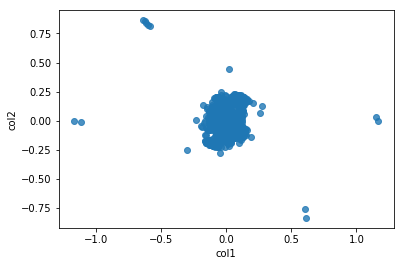

In [23]:
sns.regplot('col1', 'col2',data=df,fit_reg = False);

In [24]:
index=((np.power(df['col1'],2)+np.power(df['col2'],2)) < 0.5)

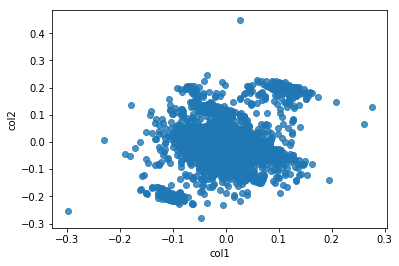

In [25]:
df=df[index]
sns.regplot('col1', 'col2',data=df,fit_reg = False);

In [26]:
train=train[index]

In [27]:
distance_0=(df['col1']==0) & (df['col2']==0)

In [28]:
train[distance_0]['fare_amount'].mean()


10.100193548387093

In [29]:
train[distance_0]['fare_amount'].median()

6.5

In [30]:
#base fare is 2.5 and there might be extra charge for waiting  
train.loc[distance_0,'fare_amount']=train[distance_0]['fare_amount'].median()

In [31]:
for train in [test,train]:
    R = 6371  #radius of earth in kilometers
    #R = 3959 #radius of earth in miles
    phi1 = np.radians(train['pickup_latitude'])      
    phi2 = np.radians(train['dropoff_latitude'])
    delta_phi = np.radians(train['dropoff_latitude']-train['pickup_latitude'])
    delta_lambda = np.radians(train['pickup_longitude']-train['dropoff_longitude'])
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    #d = R*c
    d = (R * c) #in kilometers
    train['H_Distance'] = d

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
year                 9914 non-null int64
month                9914 non-null int64
day                  9914 non-null int64
dayofweek            9914 non-null int64
hour                 9914 non-null int64
H_Distance           9914 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int64(6)
memory usage: 929.5 KB


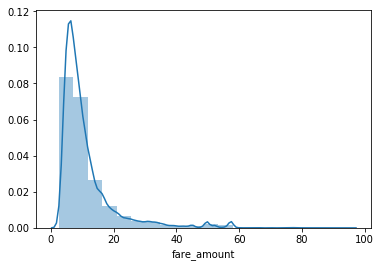

In [33]:
sns.distplot(train.loc[train['fare_amount']<100,'fare_amount'], bins=20)

In [34]:
bins = [0, 5, 10, 15, 25,100]
labels = [1,2,3,4,5]
train['fare_amt'] = pd.cut(train['fare_amount'], bins=bins, labels=labels)
df['fare_amt'] = pd.cut(train['fare_amount'], bins=bins, labels=labels)


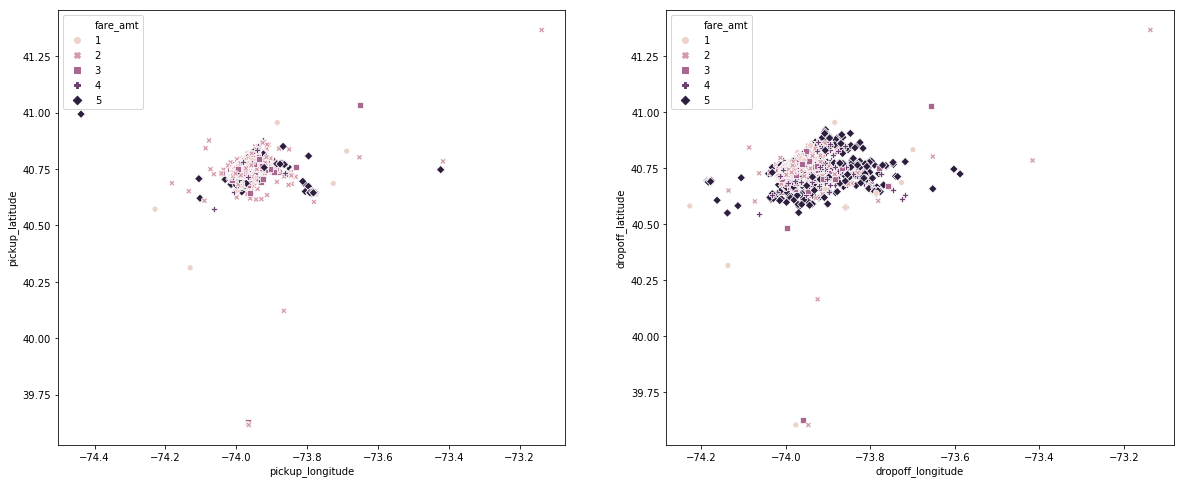

In [35]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))
axes = axes.flatten()
sns.scatterplot(data=train,x='pickup_longitude', y='pickup_latitude',hue="fare_amt",ax=axes[0],legend="full",style="fare_amt");
sns.scatterplot('dropoff_longitude', 'dropoff_latitude',data = train, ax = axes[1],hue="fare_amt",legend="full",style="fare_amt");

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15680 entries, 0 to 16066
Data columns (total 13 columns):
fare_amount          15680 non-null float64
pickup_longitude     15680 non-null float64
pickup_latitude      15680 non-null float64
dropoff_longitude    15680 non-null float64
dropoff_latitude     15680 non-null float64
passenger_count      15625 non-null float64
year                 15680 non-null float64
month                15680 non-null float64
day                  15680 non-null float64
dayofweek            15680 non-null float64
hour                 15680 non-null float64
H_Distance           15680 non-null float64
fare_amt             15680 non-null category
dtypes: category(1), float64(12)
memory usage: 1.6 MB


In [37]:
temp1=pd.Series(train['pickup_latitude'])
temp2=pd.Series(train['pickup_longitude'])
fare_amt=train['fare_amt']
dicts ={'col1':temp1,'col2':temp2,'fare_amt':fare_amt}
df1 = pd.DataFrame(dicts)

In [38]:
#it is not very good clssifier we can't use this as a feature 
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#classifier = KNeighborsClassifier(n_neighbors=7)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [39]:
#it is better to use some density based clustering technique like dbscan,hdbscan rather than knn output

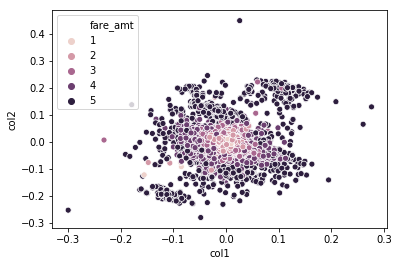

In [40]:
sns.scatterplot('col1', 'col2',data=df,hue="fare_amt",legend="full");
#wow look like we can generate one more feature 
#as fare price increase as move away from origin

In [41]:
def euc_distance(x1, x2, y1, y2,n):
    return ((abs(x2 - x1) ** n) + (abs(y2 - y1)) ** n) ** (1/n)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15680 entries, 0 to 16066
Data columns (total 13 columns):
fare_amount          15680 non-null float64
pickup_longitude     15680 non-null float64
pickup_latitude      15680 non-null float64
dropoff_longitude    15680 non-null float64
dropoff_latitude     15680 non-null float64
passenger_count      15625 non-null float64
year                 15680 non-null float64
month                15680 non-null float64
day                  15680 non-null float64
dayofweek            15680 non-null float64
hour                 15680 non-null float64
H_Distance           15680 non-null float64
fare_amt             15680 non-null category
dtypes: category(1), float64(12)
memory usage: 1.6 MB


In [43]:
#train=train.drop(['fare_km'], axis=1)

In [44]:
for train in [test,train]:
    train['euc_distance']=euc_distance(train['pickup_longitude'], train['dropoff_longitude'],train['pickup_latitude'], train['dropoff_latitude'],2)

In [45]:
#fare value alse changes with change in longitudnal and latitutenal value
for train in [test,train]:
    train['long_diff']=abs(train['pickup_longitude']-train['dropoff_longitude'])
    train['lat_diff']=abs(train['pickup_latitude']-train['dropoff_latitude'])

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 15 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
year                 9914 non-null int64
month                9914 non-null int64
day                  9914 non-null int64
dayofweek            9914 non-null int64
hour                 9914 non-null int64
H_Distance           9914 non-null float64
euc_distance         9914 non-null float64
long_diff            9914 non-null float64
lat_diff             9914 non-null float64
dtypes: datetime64[ns, UTC](1), float64(8), int64(6)
memory usage: 1.1 MB


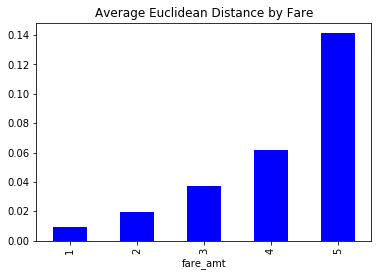

In [47]:
train.groupby('fare_amt')['euc_distance'].mean().plot.bar(color = 'b');
plt.title('Average Euclidean Distance by Fare');

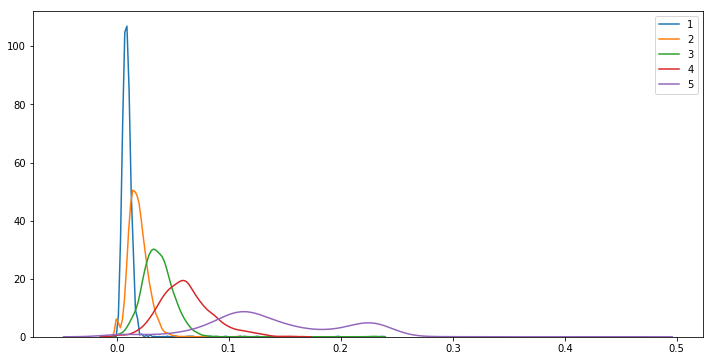

In [48]:
plt.figure(figsize = (12, 6))
for index, bins in train.groupby('fare_amt'):
    sns.kdeplot(bins['euc_distance'], label = f'{index}');
#we can see that fare amount is proportional euc_distance

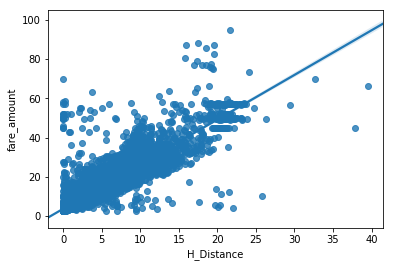

In [49]:
sns.regplot('H_Distance', 'fare_amount',data=train);

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15680 entries, 0 to 16066
Data columns (total 16 columns):
fare_amount          15680 non-null float64
pickup_longitude     15680 non-null float64
pickup_latitude      15680 non-null float64
dropoff_longitude    15680 non-null float64
dropoff_latitude     15680 non-null float64
passenger_count      15625 non-null float64
year                 15680 non-null float64
month                15680 non-null float64
day                  15680 non-null float64
dayofweek            15680 non-null float64
hour                 15680 non-null float64
H_Distance           15680 non-null float64
fare_amt             15680 non-null category
euc_distance         15680 non-null float64
long_diff            15680 non-null float64
lat_diff             15680 non-null float64
dtypes: category(1), float64(15)
memory usage: 1.9 MB


In [51]:
#removing abusrd fare 
#there are some high fair at low distance this might be bcz of longer waiting time(the time driver is waiting for passenger)
#we are not provided with any features to calculate waiting time 
train['fare_km'] = train.fare_amount.sub(2.5).div(train.H_Distance)


In [52]:
train.loc[train['H_Distance']==0,'fare_km']=1.6

In [53]:
bins = [-10,0 ,1, 2, 3, 4,5,8,15,100]
labels = [1,2,3,4,5,6,7,8,9]
train['fare_KM_bin'] = pd.cut(train['fare_km'], bins=bins, labels=labels)
df['fare_KM_bin'] = pd.cut(train['fare_km'], bins=bins, labels=labels)

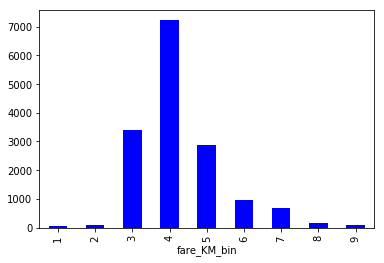

In [54]:
train[train['H_Distance'] !=0].groupby('fare_KM_bin')['fare_km'].count().plot.bar(color = 'b');

In [55]:
#removing aburdly high and low fare
train=train.loc[((train["fare_km"]<10) & (train["fare_km"]>0.6)),:]

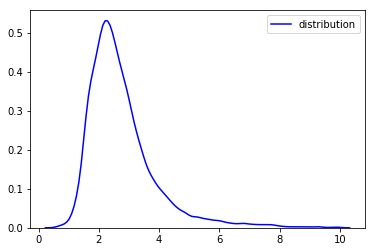

In [56]:
sns.kdeplot(train['fare_km'], color="b", label = 'distribution')

In [57]:
#reducing no of bins
bins = [0.6,3,10]
labels = [1,2]
train['fare_KM_bin'] = pd.cut(train['fare_km'], bins=bins, labels=labels)
df['fare_KM_bin'] = pd.cut(train['fare_km'], bins=bins, labels=labels)
train['fare_KM_bin'] = train['fare_KM_bin'].astype('int64')

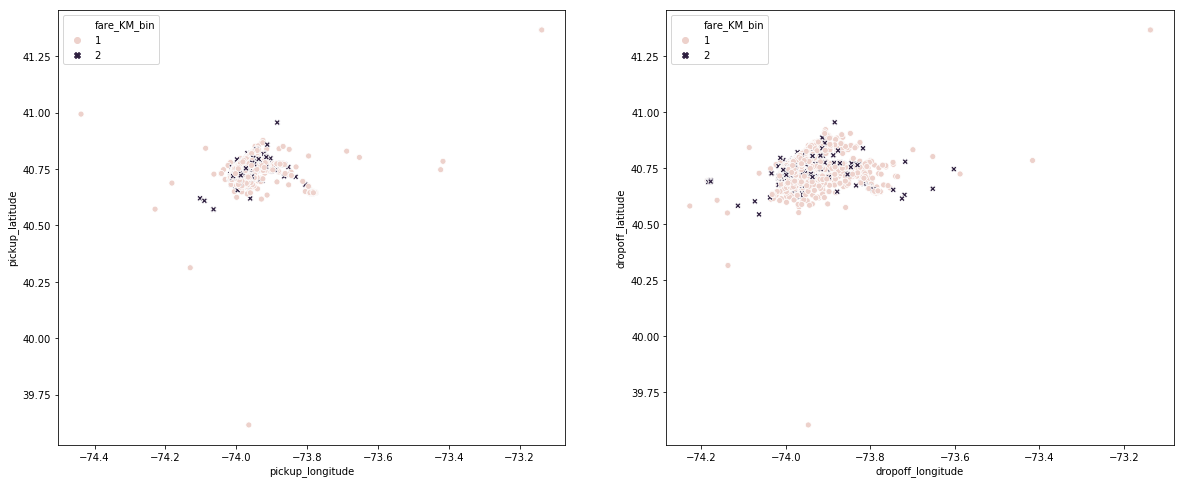

In [58]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))
axes = axes.flatten()
sns.scatterplot(data=train,x='pickup_longitude', y='pickup_latitude',hue="fare_KM_bin",ax=axes[0],legend="full",style="fare_KM_bin");
sns.scatterplot('dropoff_longitude', 'dropoff_latitude',data = train, ax = axes[1],hue="fare_KM_bin",legend="full",style="fare_KM_bin");

In [59]:
train=train.drop(["fare_km","fare_KM_bin","fare_amt"],axis=1)

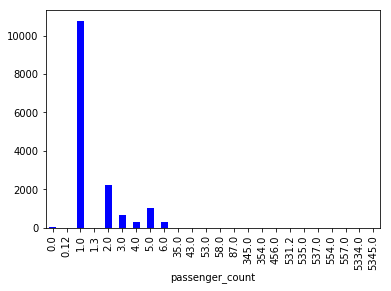

In [60]:
train.groupby('passenger_count')['fare_amount'].count().plot.bar(color = 'b');

In [61]:
train=train[train['passenger_count'].isin([1,2,3,4,5,6])]

In [62]:
train.isnull().any()

fare_amount          False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
year                 False
month                False
day                  False
dayofweek            False
hour                 False
H_Distance           False
euc_distance         False
long_diff            False
lat_diff             False
dtype: bool

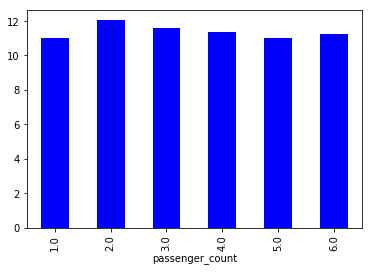

In [63]:
train.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'b');

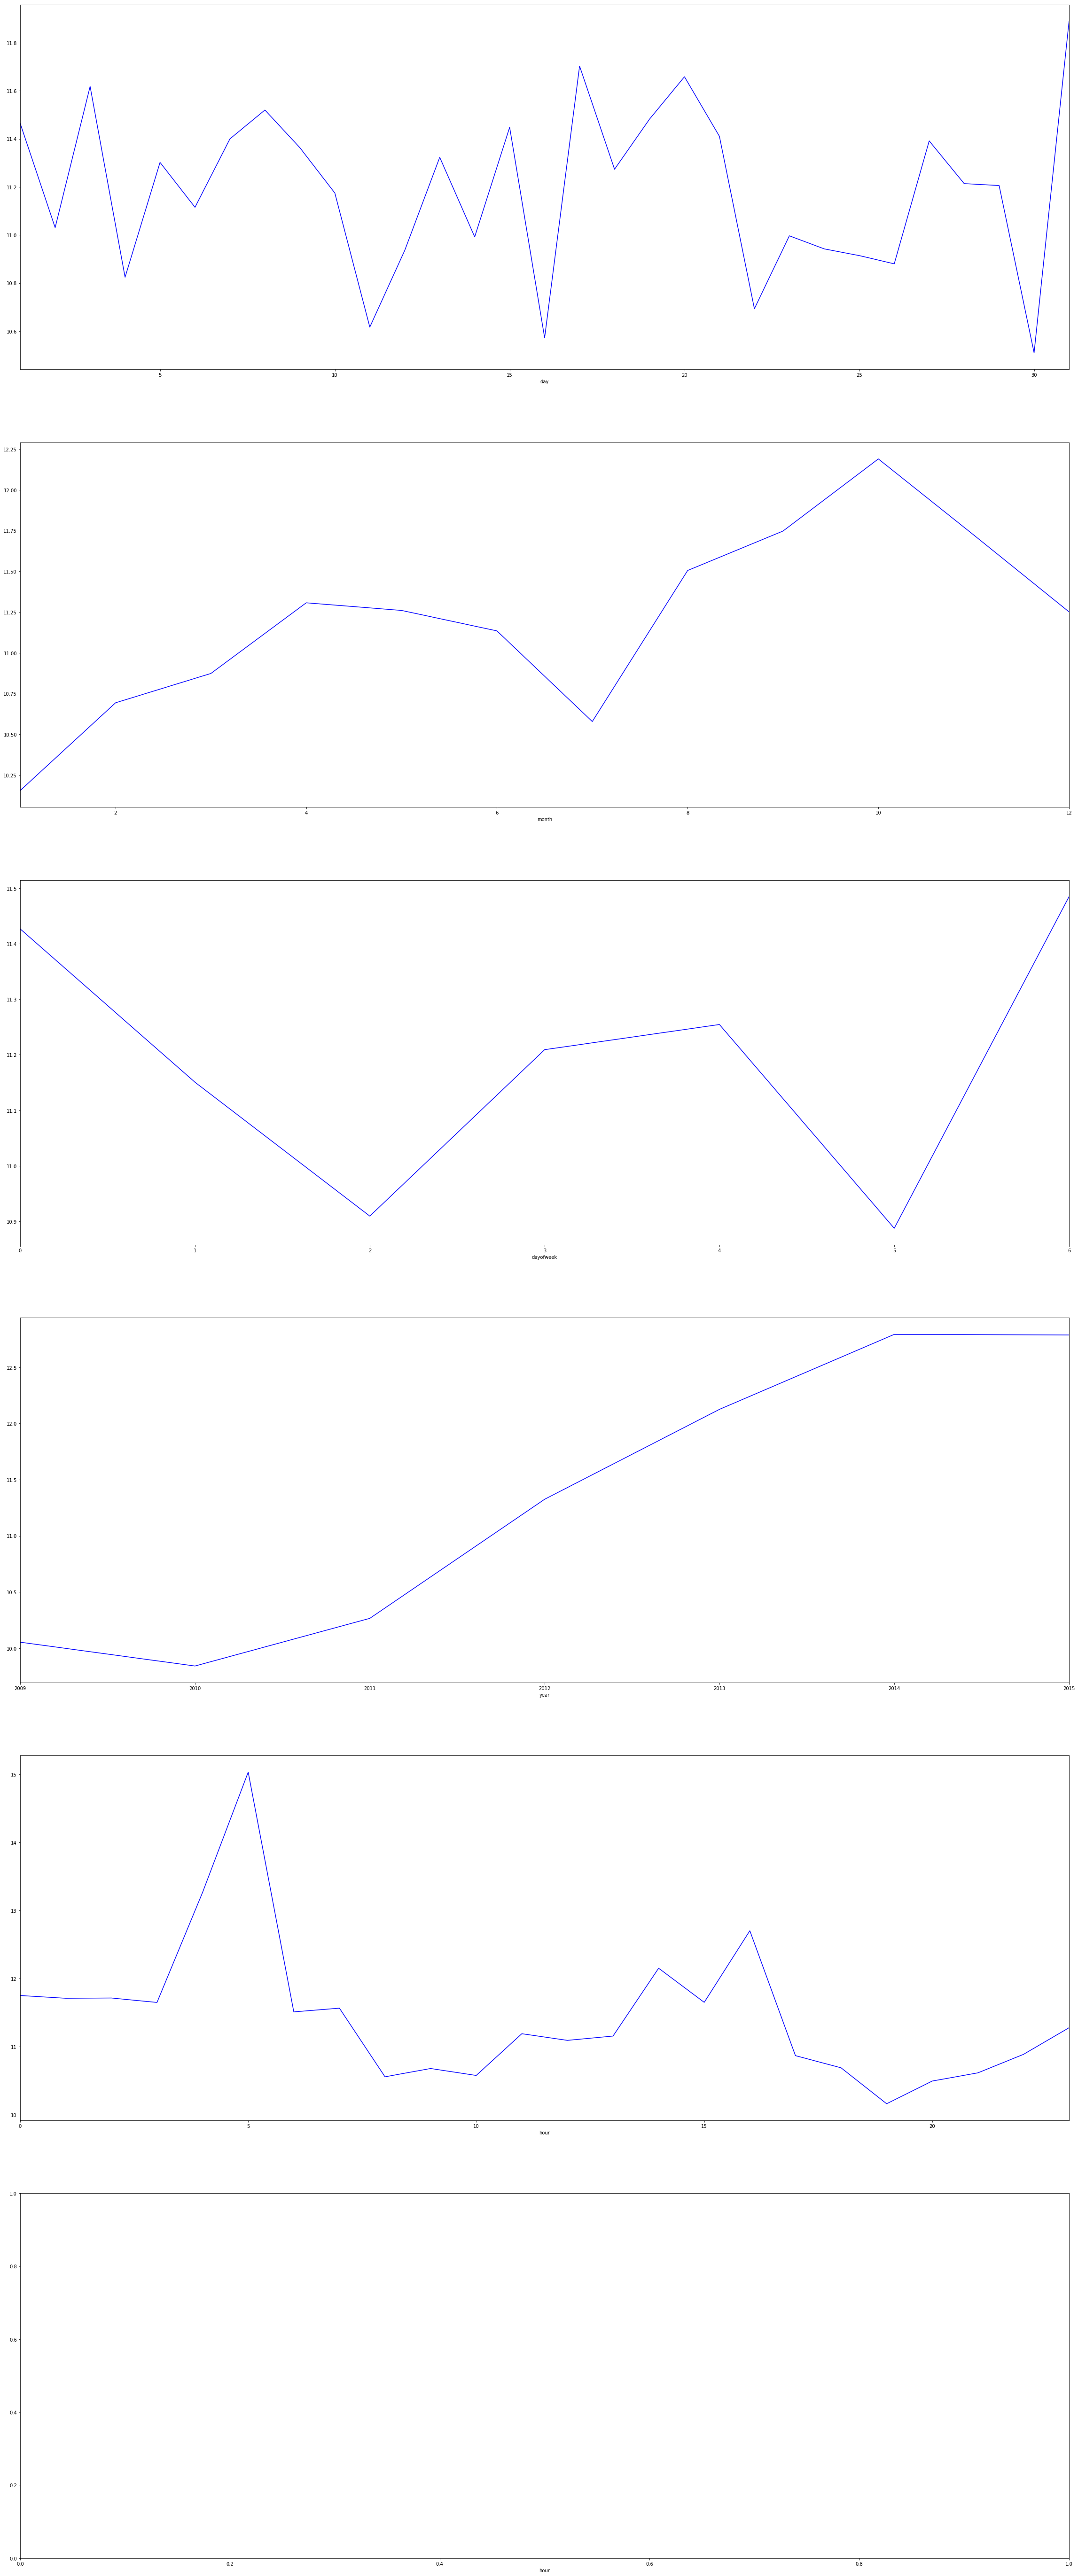

In [64]:
#let check other varible 
fig, axes = plt.subplots(6, 1, figsize = (40, 100))
j=0
for i in ["day","month","dayofweek","year","hour"]:
    train.groupby(i)['fare_amount'].mean().plot.line(color = 'b',ax=axes[j])
    plt.xlabel(i)
    plt.ylabel("")
    j=j+1

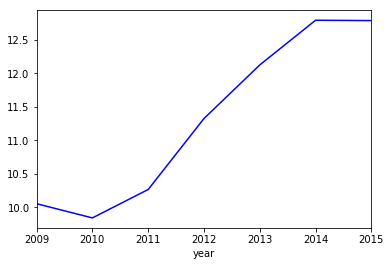

In [65]:
train.groupby("year")['fare_amount'].mean().plot.line(color = 'b')

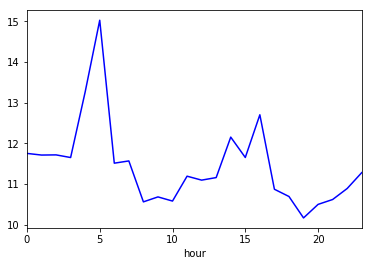

In [66]:
train.groupby("hour")['fare_amount'].mean().plot.line(color = 'b')

In [67]:
train["month"].value_counts()

3.0     1441
5.0     1439
6.0     1436
1.0     1402
4.0     1372
2.0     1254
10.0    1232
12.0    1196
11.0    1167
9.0     1142
7.0     1125
8.0     1077
Name: month, dtype: int64

In [68]:
corr=train.iloc[:,5:].corr().abs()
corr

,passenger_count,year,month,day,dayofweek,hour,H_Distance,euc_distance,long_diff,lat_diff
passenger_count,1.000000,0.001058,0.011735,0.002309,0.041622,0.018006,0.004532,0.003412,0.000559,0.008978
year,0.001058,1.000000,0.115598,0.026752,0.003930,0.003952,0.024534,0.024629,0.023771,0.022587
month,0.011735,0.115598,1.000000,0.016585,0.013177,0.001251,0.027633,0.028655,0.029261,0.017347
day,0.002309,0.026752,0.016585,1.000000,0.014063,0.000190,0.000739,0.001193,0.002668,0.002562
dayofweek,0.041622,0.003930,0.013177,0.014063,1.000000,0.087957,0.018652,0.012736,0.004971,0.041940
hour,0.018006,0.003952,0.001251,0.000190,0.087957,1.000000,0.046391,0.046580,0.042428,0.033523
H_Distance,0.004532,0.024534,0.027633,0.000739,0.018652,0.046391,1.000000,0.993547,0.891946,0.860283
euc_distance,0.003412,0.024629,0.028655,0.001193,0.012736,0.046580,0.993547,1.000000,0.936526,0.798894
long_diff,0.000559,0.023771,0.029261,0.002668,0.004971,0.042428,0.891946,0.936526,1.000000,0.556349
lat_diff,0.008978,0.022587,0.017347,0.002562,0.041940,0.033523,0.860283,0.798894,0.556349,1.000000


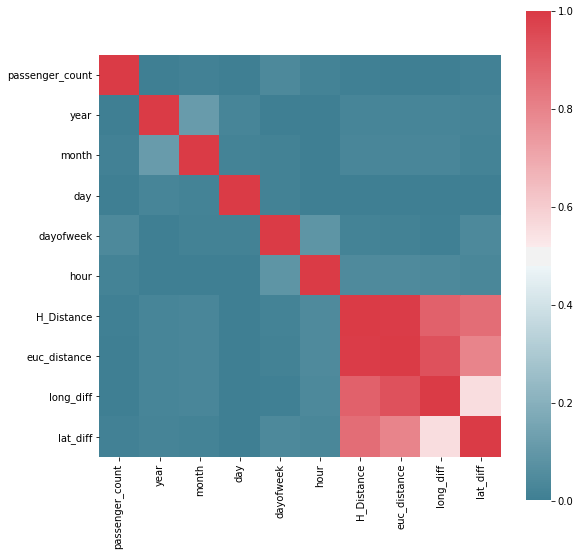

In [69]:
f, ax = plt.subplots(figsize=(9, 9))

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [70]:
#dialognal values are vif factor
pd.DataFrame(np.linalg.inv(corr), index = corr.index, columns=corr.columns)

,passenger_count,year,month,day,dayofweek,hour,H_Distance,euc_distance,long_diff,lat_diff
passenger_count,1.002158,0.000597,-0.011277,-0.001601,-0.039287,-0.014527,-0.205839,0.248470,-0.047644,-0.001590
year,0.000597,1.015081,-0.116518,-0.024490,-0.002012,-0.003404,1.087711,-1.015488,0.059510,-0.178230
month,-0.011277,-0.116518,1.014942,-0.013944,-0.011707,0.002107,-0.839989,0.785153,-0.084071,0.127729
day,-0.001601,-0.024490,-0.013944,1.002597,-0.018038,0.000217,3.213244,-3.248267,0.389851,-0.387180
dayofweek,-0.039287,-0.002012,-0.011707,-0.018038,1.040580,-0.088098,-13.668687,15.161768,-2.591801,1.048195
hour,-0.014527,-0.003404,0.002107,0.000217,-0.088098,1.011230,-1.291391,1.040510,-0.005732,0.252859
H_Distance,-0.205839,1.087711,-0.839989,3.213244,-13.668687,-1.291391,8165.638446,-8624.907256,1258.090008,-833.708159
euc_distance,0.248470,-1.015488,0.785153,-3.248267,15.161768,1.040510,-8624.907256,9200.697686,-1393.448874,844.065253
long_diff,-0.047644,0.059510,-0.084071,0.389851,-2.591801,-0.005732,1258.090008,-1393.448874,241.300516,-103.234044
lat_diff,-0.001590,-0.178230,0.127729,-0.387180,1.048195,0.252859,-833.708159,844.065253,-103.234044,101.290617


In [71]:
features = ["H_Distance","long_diff","lat_diff","euc_distance"]
# Separating out the features
temp= train.loc[:, features].values
temp= StandardScaler().fit_transform(temp)
temp1= test.loc[:, features].values
temp1= StandardScaler().fit_transform(temp1)

In [72]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(temp)
principalComponents1 = pca.fit_transform(temp1)
principalDf1 = pd.DataFrame(data = principalComponents1,columns = ['principal component 1', 'principal component 2'])
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

In [73]:
pca.explained_variance_
pca.explained_variance_ratio_.cumsum()

array([0.89550005, 0.99758558])

In [74]:
x=pd.concat([train.reset_index(drop=True),principalDf.reset_index(drop=True)], axis=1)
y=pd.concat([test.reset_index(drop=True),principalDf1.reset_index(drop=True)], axis=1)

In [75]:
train=x
test=y

In [76]:
#train = train.loc[:,~train.columns.duplicated()]

In [77]:
train=train.drop(["euc_distance","long_diff","lat_diff","H_Distance"],axis=1)

In [78]:
#train['fare_amt1']= train['fare_amt1'].astype('int64')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 17 columns):
pickup_datetime          9914 non-null datetime64[ns, UTC]
pickup_longitude         9914 non-null float64
pickup_latitude          9914 non-null float64
dropoff_longitude        9914 non-null float64
dropoff_latitude         9914 non-null float64
passenger_count          9914 non-null int64
year                     9914 non-null int64
month                    9914 non-null int64
day                      9914 non-null int64
dayofweek                9914 non-null int64
hour                     9914 non-null int64
H_Distance               9914 non-null float64
euc_distance             9914 non-null float64
long_diff                9914 non-null float64
lat_diff                 9914 non-null float64
principal component 1    9914 non-null float64
principal component 2    9914 non-null float64
dtypes: datetime64[ns, UTC](1), float64(10), int64(6)
memory usage: 1.3 MB


In [79]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=20).fit_predict(train[['pickup_latitude', 'pickup_longitude']])
clusterer1=hdbscan.HDBSCAN(min_cluster_size=20).fit_predict(train[['dropoff_latitude', 'dropoff_longitude']])
train['pickup_area'] = clusterer
train['dropoff_area'] =clusterer1

In [80]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, prediction_data=True).fit(train[['pickup_latitude', 'pickup_longitude']])
test_labels, strengths = hdbscan.approximate_predict(clusterer, test[['pickup_latitude', 'pickup_longitude']])

In [81]:
test['pickup_area']=test_labels

In [82]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, prediction_data=True).fit(train[['dropoff_latitude', 'dropoff_longitude']])
test_labels, strengths = hdbscan.approximate_predict(clusterer, test[['dropoff_latitude', 'dropoff_longitude']])

In [83]:
test['dropoff_area']=test_labels

In [84]:
test=test.drop(["euc_distance","long_diff","lat_diff","H_Distance","pickup_datetime"],axis=1)

In [85]:
test=test.iloc[:,4:]

In [86]:
train['pickup_area'].value_counts()

 12    14077
-1       406
 5       129
 9        98
 14       84
 6        68
 10       68
 8        61
 1        49
 0        47
 4        44
 7        36
 3        36
 13       31
 2        28
 11       21
Name: pickup_area, dtype: int64

In [87]:
X = train.iloc[:,1:]
Y = train['fare_amount']
train_X, val_X, train_y, val_y = train_test_split(X, Y,test_size=.25,random_state=42)

train_X=train_X.iloc[:,4:]
val_X=val_X.iloc[:,4:]

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(train_X)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     8550.
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:34:40   Log-Likelihood:                -29459.
No. Observations:               11462   AIC:                         5.894e+04
Df Residuals:                   11451   BIC:                         5.902e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -968.15

In [89]:
train_X=train_X.drop(["day"],axis=1)
val_X=val_X.drop(["day"],axis=1)
test=test.drop(["day"],axis=1)

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 9 columns):
passenger_count          9914 non-null int64
year                     9914 non-null int64
month                    9914 non-null int64
dayofweek                9914 non-null int64
hour                     9914 non-null int64
principal component 1    9914 non-null float64
principal component 2    9914 non-null float64
pickup_area              9914 non-null int32
dropoff_area             9914 non-null int32
dtypes: float64(2), int32(2), int64(5)
memory usage: 619.7 KB


In [91]:
lm=LinearRegression()
lm.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
pred_fare=lm.predict(val_X)
valid_pred=abs((val_y-pred_fare)/val_y)
valid_mape = 100 * np.mean(valid_pred)

In [93]:
valid_mape

19.253908724236624

In [94]:
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 20, 
                                      max_features = None, oob_score = True, 
                                      bootstrap = True, verbose = 1, n_jobs = -1)
random_forest.fit(train_X,train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=1, warm_start=False)

In [95]:
pred_fare=random_forest.predict(val_X)
valid_pred=abs((val_y-pred_fare)/val_y)
valid_mape_random_forest = 100 * np.mean(valid_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [96]:
(x["H_Distance"]<2).sum()

6972

In [97]:
valid_mape_random_forest

16.054785078643423

In [98]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.03,
        'max_depth': -1,
        'bagging_fraction' : 1,
        'bagging_freq': 15,
        'colsample_bytree': 1,
        'metric': 'mape',
        'min_split_gain': 0.8,
        'min_child_weight': 1,
        'min_child_samples': 15,
        'scale_pos_weight':1,
        'num_rounds':50000
    }
train_set = lgbm.Dataset(train_X, train_y, silent=False)
valid_set = lgbm.Dataset(val_X,val_y, silent=False)
model = lgbm.train(params, train_set = train_set, num_boost_round=100000,early_stopping_rounds=1000,verbose_eval=200, valid_sets=[valid_set,train_set])

C:\Users\HP\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 1000 rounds.
[200]	training's mape: 0.14315	valid_0's mape: 0.151156
[400]	training's mape: 0.133815	valid_0's mape: 0.147855
[600]	training's mape: 0.128527	valid_0's mape: 0.147431
[800]	training's mape: 0.128527	valid_0's mape: 0.147431
[1000]	training's mape: 0.128527	valid_0's mape: 0.147431
[1200]	training's mape: 0.128527	valid_0's mape: 0.147431
[1400]	training's mape: 0.128527	valid_0's mape: 0.147431
Early stopping, best iteration is:
[592]	training's mape: 0.128528	valid_0's mape: 0.14743


In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 9 columns):
passenger_count          9914 non-null int64
year                     9914 non-null int64
month                    9914 non-null int64
dayofweek                9914 non-null int64
hour                     9914 non-null int64
principal component 1    9914 non-null float64
principal component 2    9914 non-null float64
pickup_area              9914 non-null int32
dropoff_area             9914 non-null int32
dtypes: float64(2), int32(2), int64(5)
memory usage: 619.7 KB


In [100]:
#predicting using the model providing lowest MAPE Score 
test["fare_amount"]=model.predict(test,num_iteration=model.best_iteration)

In [101]:
y["fare_amount"]=model.predict(test,num_iteration=model.best_iteration)

In [102]:
y.loc[:,["fare_amount","H_Distance"]]

,fare_amount,H_Distance
0,10.146010,2.323259
1,10.000142,2.425353
2,5.025495,0.618628
3,7.868133,1.961033
4,14.014110,5.387301
5,10.453367,3.222549
6,6.236584,0.929601
7,54.055382,21.540102
8,11.249540,3.873962
9,7.370453,1.099794
